In [38]:
import yfinance as yf
import pandas as pd
import numpy as np

In [39]:
df = pd.read_csv('btc_data.csv')

In [40]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19 00:00:00+00:00,424.102997,427.834992,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21 00:00:00+00:00,408.084992,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
3694,2024-10-28 00:00:00+00:00,67922.671880,70212.265630,67535.132810,69907.757810,69907.757810,3.879986e+10
3695,2024-10-29 00:00:00+00:00,69910.046880,73577.210940,69729.914060,72720.492190,72720.492190,5.854187e+10
3696,2024-10-30 00:00:00+00:00,72715.367190,72905.296880,71411.734380,72339.539060,72339.539060,4.064664e+10
3697,2024-10-31 00:00:00+00:00,72335.046880,72662.312500,69590.500000,70215.187500,70215.187500,4.062791e+10


In [41]:
#df.reset_index(inplace=True)
#df['Date'] = df['Date'].dt.date

In [42]:
#df

In [43]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19 00:00:00+00:00,424.102997,427.834992,384.532013,394.795990,394.795990,37919700.0
3,2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,2014-09-21 00:00:00+00:00,408.084992,412.425995,393.181000,398.821014,398.821014,26580100.0


In [44]:
df.shape

(3699, 7)

In [45]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3699.000000,3699.000000,3699.000000,3699.000000,3699.000000,3.699000e+03
mean,18379.302382,18792.216369,17941.881557,18396.974042,18396.974042,1.778562e+10
std,20174.352448,20614.937062,19699.840781,20188.305349,20188.305349,1.915772e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,1180.100036,1197.334961,1164.174988,1182.809998,1182.809998,3.301950e+08
50%,9241.897461,9396.040039,9088.947266,9244.972656,9244.972656,1.412859e+10
75%,29795.587895,30324.918950,29270.495115,29803.213870,29803.213870,2.880631e+10
max,73079.375000,73750.070310,71411.734380,73083.500000,73083.500000,3.510000e+11


In [46]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3699 entries, 0 to 3698
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3699 non-null   object 
 1   Open       3699 non-null   float64
 2   High       3699 non-null   float64
 3   Low        3699 non-null   float64
 4   Close      3699 non-null   float64
 5   Adj Close  3699 non-null   float64
 6   Volume     3699 non-null   float64
dtypes: float64(6), object(1)
memory usage: 202.4+ KB


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

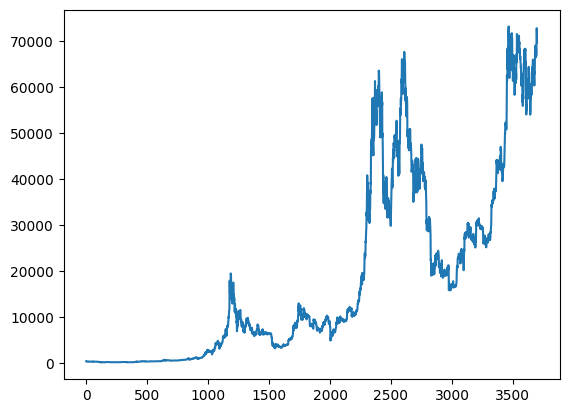

In [49]:
plt.plot(df.index, df['Adj Close'])
plt.show()

#Spliting the data into training and testing
using 90% of the data for training and remaining 10% for testing

In [50]:
to_row = int(len(df)*0.9)

training_data = list(df[0:to_row]['Adj Close'])
testing_data = list(df[to_row:]['Adj Close'])

#Plotting as a graph

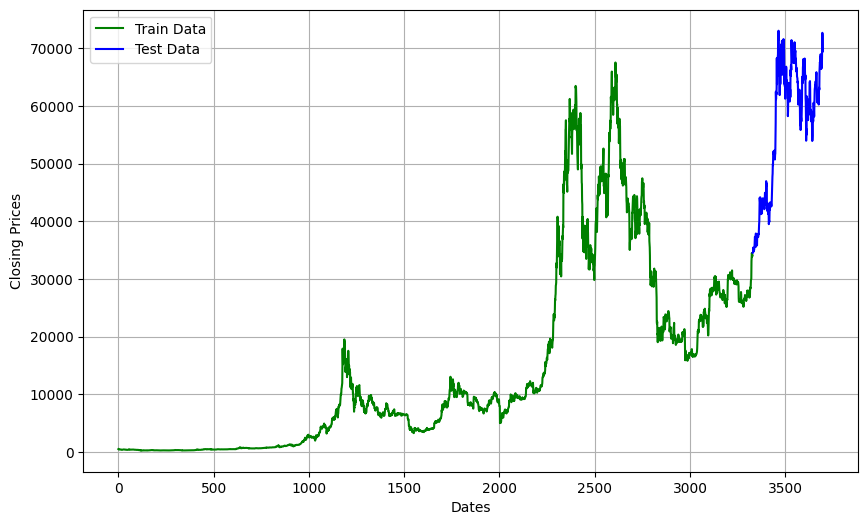

In [51]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['Adj Close'], 'green', label='Train Data')
plt.plot(df[to_row:]['Adj Close'], 'blue', label='Test Data')
plt.legend()

#Fitting the model

In [52]:
model_predictions = []
n_test_observations = len(testing_data)

In [53]:
for i in range(n_test_observations):
  model = ARIMA(training_data, order=(4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  model_predictions.append(yhat)
  actual_test_value = testing_data[i]
  training_data.append(actual_test_value)


In [54]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3698
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -30356.781
Date:                Sat, 02 Nov 2024   AIC                          60723.561
Time:                        01:55:14   BIC                          60754.638
Sample:                             0   HQIC                         60734.621
                               - 3698                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0438      0.009     -5.055      0.000      -0.061      -0.027
ar.L2          0.0225      0.009      2.482      0.013       0.005       0.040
ar.L3          0.0083      0.009      0.930      0.3

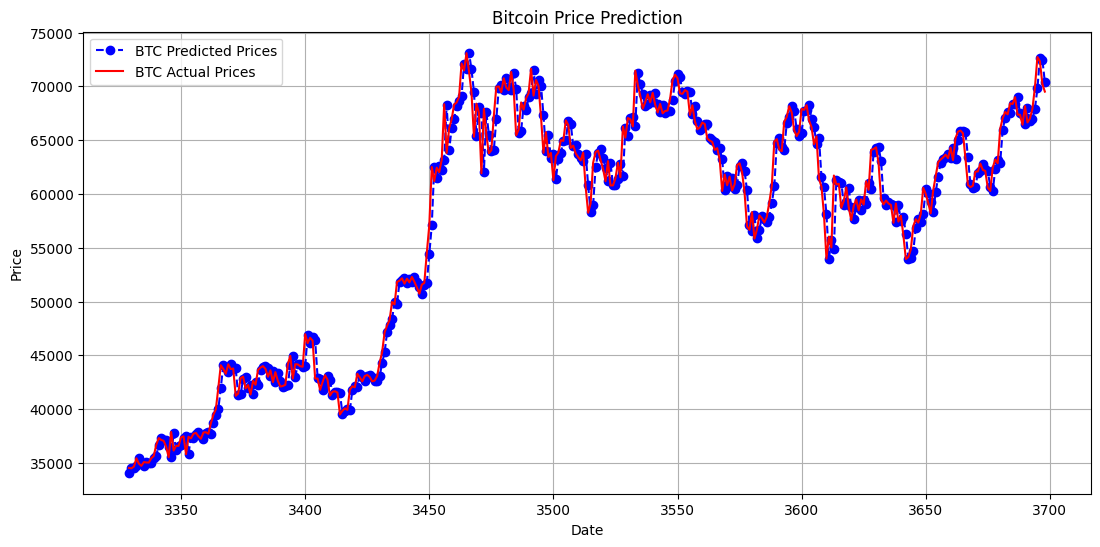

In [56]:
plt.figure(figsize=(13,6))
plt.grid(True)

date_range = df[to_row:].index
plt.plot(date_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='BTC Predicted Prices')
plt.plot(date_range, testing_data, color='red', label='BTC Actual Prices')

plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#Performance Metrics

In [59]:

mape = np.mean(np.abs(np.array(model_predictions) - np.array(testing_data))/np.abs(np.array(testing_data)))
mse = mean_squared_error(testing_data, model_predictions)
rmse = math.sqrt(mse)
mae = mean_absolute_error(testing_data, model_predictions)
print('Mean Absolute Percentage Error: ', mape)
print('Mean Squared Error: ', mse)
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error: ', mae)

Mean Absolute Percentage Error:  0.01945428226746076
Mean Squared Error:  2496822.79745452
Root Mean Squared Error:  1580.133790998256
Mean Absolute Error:  1124.8905113864685


In [61]:
r2 = r2_score(testing_data, model_predictions)
print('R-squared: ', r2)

R-squared:  0.9800483061718595


In [62]:
#performance metrics
accuracy = 100 - mape*100
print('Accuracy: ', accuracy)

Accuracy:  98.05457177325393


#Checking for the next 7 days

In [63]:

forecast_period = 20
forecast = model_fit.forecast(steps=forecast_period)

last_date = '2024-10-09'

last_date = pd.to_datetime(last_date)

forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_period)

forecast_df = pd.DataFrame(forecast, index=forecast_dates, columns=['Forecasted Price'])


print(forecast_df)


            Forecasted Price
2024-10-10      70375.235343
2024-10-11      70391.404913
2024-10-12      70366.632727
2024-10-13      70313.355915
2024-10-14      70319.489735
2024-10-15      70318.241463
2024-10-16      70317.338898
2024-10-17      70315.995404
2024-10-18      70316.185440
2024-10-19      70316.106411
2024-10-20      70316.079199
2024-10-21      70316.044737
2024-10-22      70316.049993
2024-10-23      70316.046675
2024-10-24      70316.045935
2024-10-25      70316.045027
2024-10-26      70316.045161
2024-10-27      70316.045041
2024-10-28      70316.045022
2024-10-29      70316.044998


#Checking for any date in the future

In [64]:

target_date = '2024-10-29'
target_date = pd.to_datetime(target_date)

last_date = '2024-10-09'
last_date = pd.to_datetime(last_date)

steps_ahead = (target_date - last_date).days

forecast = model_fit.forecast(steps=steps_ahead)

forecast_value = forecast[-1]

print(f"Forecasted Price for {target_date.date()}: {forecast_value}")


Forecasted Price for 2024-10-29: 70316.04499773776


In [65]:
len(testing_data)

370

In [66]:
import pickle

# Save the model
with open('model_arima.pkl', 'wb') as file:
    pickle.dump(model, file)
print("Model saved as model_arima.pkl")


Model saved as model_arima.pkl
